In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

Suppose the globe tossing data had turned out to be 8 water in 15 tosses.
Construct the posterior distribution, using grid approximation. Use the
same flat prior as before.

In [2]:
# Our model is 
# W ~ Binomial(N, p)
# p ~ Uniform(0, 1)

NUM_DRAWS = 10000
K = 8
N = 15
NUM_POS_SAMPLES = 5000

np.random.seed(4017)

p_grid = np.linspace(start=0.0, stop=1.0, num=NUM_DRAWS)
prob_prior = np.ones(NUM_DRAWS)
prob_likelihood = stats.binom.pmf(K, N, p=p_grid)
posterior = prob_prior * prob_likelihood
posterior = posterior / posterior.sum()
print(prob_prior.shape, posterior.shape)

(10000,) (10000,)


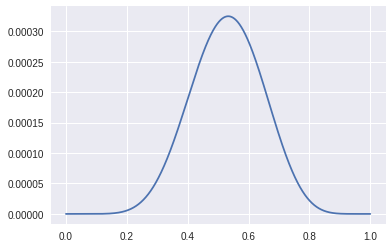

In [3]:
plt.plot(p_grid, posterior)
plt.show()

In [4]:
samples = np.random.choice(p_grid, size=NUM_POS_SAMPLES, p=posterior)

In [5]:
samples.mean()

0.5302836483648365

In [6]:
np.percentile(samples, q=[0.5, 99.5])

array([0.2270182 , 0.80928343])

Start over in 1, but now use a prior that is zero below p = 0:5 and a constant
above p = 0:5. This corresponds to prior information that a majority
of the Earth’s surface is water. What difference does the better prior make?
If it helps, compare posterior distributions (using both priors) to the true
value p = 0:7.

In [7]:
k = 8
n = 15
NUM_DRAWS = 10000

p_grid = np.linspace(start=0.0, stop=1.0, num=NUM_DRAWS)

def prior():
    prob = np.random.uniform(low=0.0, high=1.0, size=NUM_DRAWS)
    return np.array([ x >= 0.5 for x in prob], dtype=np.int32)    

prior = np.hstack((np.zeros(5000), np.ones(5000))) 
likelihood = stats.binom.pmf(k, n, p=p_grid)
improved_posterior = likelihood * prior
improved_posterior = improved_posterior / improved_posterior.sum()
print(posterior.shape, prior.shape)

(10000,) (10000,)


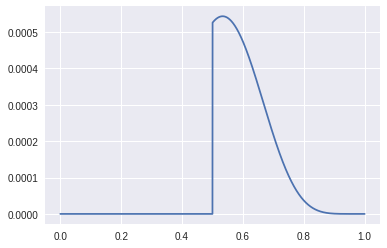

In [8]:
plt.plot(p_grid, improved_posterior)
plt.show()

In [9]:
improved_samples = np.random.choice(p_grid, size=NUM_POS_SAMPLES, p=improved_posterior)

In [10]:
samples.mean()

0.5302836483648365

In [11]:
np.percentile(samples, q=[0.5, 99.5])

array([0.2270182 , 0.80928343])

actually the new prior is more close to actual probability. Hence, we can get a good estimation for the estimated p.

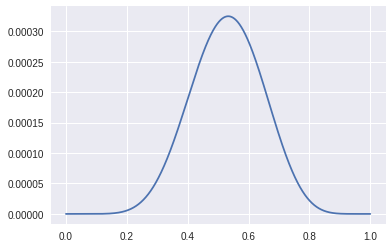

In [12]:
plt.plot(p_grid, posterior)
#plt.plot(p_grid, improved_posterior)
plt.show()

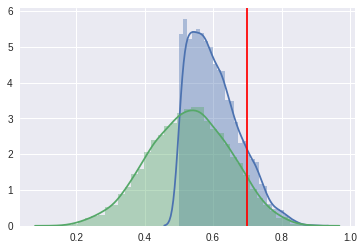

In [13]:
sns.distplot(improved_samples)
sns.distplot(samples)
plt.axvline(0.7, color='red')
plt.show()

Since we don't have enough data, informative prior helps. 